# INF200 Lecture No 10

### 15 November 2021

## Today's topics

1. Staying in control
    1. Exceptions
    1. Testing
1. Some advanced Python concepts
    1. Factories and closures
    1. Decorators and memoization
    1. Properties
    1. Iterators and generators
1. Generating Data / Scientific Computing
    1. SymPy: Symbolic Algebra with Python
    1. Limits of numerical precision
    1. SciPy: A Scientific Python package

------------

# Staying in control


### Techniques towards reliability

- **Assertions**
    - check that requirements are fulfilled
    - stop execution if requirement not fulfilled
    - key use cases
        - very simple "emergency stops" if we don't want to spend time on proper error handling
        - catching things that "cannot happen", but where we want to be on the safe side (in large projects, you never know ...)
- **Exceptions**
    - mechanism for signaling that something unexpected happended
    - available in most modern programming languages
    - exceptions are *raised* or *thrown* when a problem is detected
    - exceptions can be *caught* and *handled*, e.g., by issuing a useful error message
    - in some languages, e.g., Python, exceptions are also used as part of normal programming
- **Testing**
    - systematic testing of code can help us to find errors
    - a proper set of tests also helps us to avoid introducing new errors as software evolves
    - *unit tests* are tests of small parts of code, typically functions
    - *integration tests* test that the parts of a larger project work together
    - *regression tests* are added when a bug is discovered
        - the test reproduces the bug
        - when the bug is fixed, the test passes
        - we keep the test, in case we should re-introduce the bug by a later change (regress)

----------

## Assertions

- *pass* if a boolean expression is True
- *fail* if a boolean expression is False

In [1]:
import math

def area(r):
    """Returns area of circle with radius r."""
    
    assert r >= 0, 'Circle radius must be positive.'
    
    return math.pi * r**2

In [2]:
area(1)

3.141592653589793

In [3]:
area(-1)

AssertionError: Circle radius must be positive.

-------

## Exceptions

- Exceptions provide more fine-grained control over unexpected situations
- Python defines a number of different exception types (see [Python Documentation](https://docs.python.org/3/library/exceptions.html))
- The exception types are arranged as a class hierarchy
- The diagram shows some of the pre-defined exception types

        +-- Exception
              +-- StandardError
              |    +-- ArithmeticError
              |    |    +-- FloatingPointError
              |    |    +-- OverflowError
              |    |    +-- ZeroDivisionError
              |    +-- AssertionError
              |    +-- AttributeError
              |    +-- EnvironmentError
              |    |    +-- IOError
              |    +-- EOFError
              |    +-- ImportError
              |    +-- LookupError
              |    |    +-- IndexError
              |    |    +-- KeyError
              |    +-- NameError
              |    +-- RuntimeError
              |    |    +-- NotImplementedError
              |    +-- SyntaxError
              |    |    +-- IndentationError
              |    |         +-- TabError
              |    +-- SystemError
              |    +-- TypeError
              |    +-- ValueError
              
- We can use an exception in our `area()` function
    - We `raise` the exception: execution stops here
    - The type of exception indicates the kind of problem
    - We can provide an error message to be sent to the user

In [4]:
def area(r):
    """Returns area of circle with radius r."""
    
    if r < 0:
        raise ValueError('Circle radius must be positive.')
    
    return math.pi * r**2

In [5]:
area(10)

314.1592653589793

In [6]:
area(-5)

ValueError: Circle radius must be positive.

- Almost the same effect as an assertion

### Catching exceptions

- But we can catch an exception and handle it

In [9]:
while True:
    r = float(input('Radius: '))
    if r == 0:
        break
    try:
        print('    Area:', area(r))
    except ValueError:
        print('    An error occured')

Radius:  -5


    An error occured


Radius:  0


- We can also extract the error message an print it

In [10]:
while True:
    r = float(input('Radius: '))
    if r == 0:
        break
    try:
        print('    Area:', area(r))
    except ValueError as err:
        print(err)

Radius:  -5


Circle radius must be positive.


Radius:  0


- Or even nicer for the user

In [11]:
while True:
    r = float(input('Radius: '))
    if r == 0:
        break
    try:
        print('    Area:', area(r))
    except ValueError as err:
        print('    ERROR: {}\n    Please try again!'.format(err))

Radius:  -5


    ERROR: Circle radius must be positive.
    Please try again!


Radius:  0


### Separation of error detection and handling

- We *raise* an exception at the point in the code where we detect a problem.
    - Example: in the `area()` function
- We *handle* the exception where we best can regain control, e.g., by "talking" to the user
- This can be rather far away from where the error is raised—see in-class chutes example.

### Exceptions as part of normal programming (Python style)

- In certain cases, we can use exceptions to choose action
- First try something, then something else
- Consider a string containing numbers

        2 3.4 12.8 72
        
- Converting this directly into numbers would force us to make all floats

In [12]:
s = "2 3.4 12.8 72"
[float(num) for num in s.split()]

[2.0, 3.4, 12.8, 72.0]

- We can try to convert to `int` first and only convert to `float` if that fails

In [13]:
def float_or_int(s):
    try:
        return int(s)
    except ValueError:
        return float(s)

[float_or_int(num) for num in s.split()] 

[2, 3.4, 12.8, 72]

-------

## Testing Python code

- Systematic testing is essential part of quality control
- Do not trust code that comes without tests!
- But: passings tests are no guarantee that everything is correct
    - Tests might not cover all code
    - Tests may not cover all possible situations
    - Tests may pass for the wrong reasons
- Different levels of testing
    - Unit tests: test "units", i.e., functions and methods
    - Integration tests: test larger parts, e.g., modules or packages
    - Acceptance tests: tests by client required for accepting delivery, test the entire system against client use-cases
    - Regression tests: test detecting bugs in earlier versions, kept to avoid falling back to old mistakes

### Agile software development

- [Agile software development](https://en.wikipedia.org/wiki/Agile_software_development) is a modern (2001-) set of software development methods
- Focus on quick delivery, frequent updates, and flexibility, while maintaining quality
- Strong focus on testing
- [Test-driven development](https://en.wikipedia.org/wiki/Test-driven_development) is part of Agile
    - Write tests first, otherwise you'll write them never
    - Writing tests for working code often results in weak tests
    - Therefore
        1. Write test
        1. Write code only when a test fails
        1. Write code until tests passes (and no more)
        1. Review and refactor code without breaking tests
        1. Go back to 1
    - Important: Always run all tests after code changes
- Advantages
    - We can be much more confident in our code
    - We can make changes, big and small, and immediately check that the code still works correctly

### Tools for testing

- Systems for automatically running tests on changes or commits
    - often known as [continuous integration](https://en.wikipedia.org/wiki/Continuous_integration)
    tools
    - "watch" VCS repository and run tests on each commit or push
    - notify developers in case of trouble
    - can be combined with code-review platforms
    - GitLab Pipelines (more later), [Jenkins](http://jenkins-ci.org), [GitHub & Travis](http://docs.travis-ci.com/user/getting-started/), [Bitbucket Bamboo](https://www.atlassian.com/software/bamboo)

### Writing tests

There are several tools (frameworks) for writing and running tests in Python

- [unittest](https://docs.python.org/2/library/unittest.html)
    - advantage: part of standard Python
    - disadvantage: no automated test discovery
- [nosetest](https://nose.readthedocs.org/en/latest/testing.html)
    - advantage: automated test discovery
    - disadvantage: no longer actively maintained (nor is nosetest2)
- [pytest](https://docs.pytest.org/en/latest/index.html)
    - automated test discovery
    - easy coding style
    - actively developed
    - powerful advanced features
- We will use pytest 

### pytest basics

- pytest finds tests automatically
- Any file named `test_*.py` or `*_test.py` will be considered a collection of tests
- In such files
    - any function called `test_*`
    - any method called `test_*` in a class called `Test*`
  will be run as tests
- See [pytest documentation](https://docs.pytest.org/en/latest/goodpractices.html) for more on test discovery
- A test *passes* if it does not throw an exception
- In pytest, all checks are implemented as `assert`
- Module `pynest` provides useful tools

### Tests and randomness

Tests including random numbers introduce particular problems; we leave those for later.

### A Pytest example

#### Preparations

- We will create some files in which we will store our test code
- We create a separate directory for those, removing it if it should exist

In [38]:
%rm -rf tests
%mkdir -p tests

- We then use the `%%writefile` magic to write our test file.
- The first test includes the code that it tests.
- The second test is deliberately incorrect to show what happens when a test fails.

In [39]:
%%writefile tests/test_example.py

def square(x):
    return x * x

def test_square_1():
    assert square(1) == 1
    
def test_square_2():
    assert square(2) == 3

Writing tests/test_example.py


#### Running the tests

- We run the test by executing the `pytest` program
- Several alternatives
    - `pytest` searches for tests in our current working directory and all subdirectories
    - `pytest tests` searches for tests in directory `tests`
    - `pytest tests/text_example.py` searches for tests in `test/text_example.py`
- If working on macOS or Linux, one could run all the example below like this in notebook cells:
    ```shell
    !pytest tests/test_example.py
    ```
    as if one would run them from the Terminal.
- To ensure that the examples work also under Windows, we run PyTest here from inside Python; this is not the usual way of running tests.

In [46]:
import pytest

In [47]:
pytest.main(['tests/test_example.py'])

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.4, py-1.10.0, pluggy-0.13.1
Using --randomly-seed=2938801928
rootdir: /Users/plesser/Courses/INF200/H2021/inf200-course-materials/lectures/l09
plugins: cov-2.12.1, randomly-3.10.1, anyio-2.2.0, xdist-2.3.0, mock-3.6.1, timeout-1.4.2, forked-1.3.0
collected 2 items

tests/test_example.py F.                                                 [100%]

=================================== FAILURES ===================================
________________________________ test_square_2 _________________________________

    def test_square_2():
>       assert square(2) == 3
E       assert 4 == 3
E        +  where 4 = square(2)

tests/test_example.py:9: AssertionError
=========================== short test summary info ============================
FAILED tests/test_example.py::test_square_2 - assert 4 == 3
========================= 1 failed, 1 passed in 0.03s ===================

<ExitCode.TESTS_FAILED: 1>

- We see that one test failed, one passed
- We create a corrected test

In [49]:
%%writefile tests/test_example_fixed.py

def square(x):
    return x * x

def test_square_1():
    assert square(1) == 1
    
def test_square_2():
    assert square(2) == 4

Writing tests/test_example_fixed.py


In [50]:
pytest.main(['tests/test_example_fixed.py'])

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.4, py-1.10.0, pluggy-0.13.1
Using --randomly-seed=2938801928
rootdir: /Users/plesser/Courses/INF200/H2021/inf200-course-materials/lectures/l09
plugins: cov-2.12.1, randomly-3.10.1, anyio-2.2.0, xdist-2.3.0, mock-3.6.1, timeout-1.4.2, forked-1.3.0
collected 2 items

tests/test_example_fixed.py ..                                           [100%]

============================== 2 passed in 0.03s ===============================


<ExitCode.OK: 0>

- Now both tests pass
- We can get more information with the `-v` option

In [51]:
pytest.main(['-v', 'tests/test_example_fixed.py'])

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.4, py-1.10.0, pluggy-0.13.1 -- /Users/plesser/opt/miniconda3/envs/inf200/bin/python
cachedir: .pytest_cache
Using --randomly-seed=2938801928
rootdir: /Users/plesser/Courses/INF200/H2021/inf200-course-materials/lectures/l09
plugins: cov-2.12.1, randomly-3.10.1, anyio-2.2.0, xdist-2.3.0, mock-3.6.1, timeout-1.4.2, forked-1.3.0
collecting ... collected 2 items

tests/test_example_fixed.py::test_square_2 PASSED                        [ 50%]
tests/test_example_fixed.py::test_square_1 PASSED                        [100%]

============================== 2 passed in 0.02s ===============================


<ExitCode.OK: 0>

- If we call `pytest` without specifying the test file, it will run all tests (works from command line only)

In [53]:
!pytest -v

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.4, py-1.10.0, pluggy-0.13.1 -- /Users/plesser/opt/miniconda3/envs/inf200/bin/python
cachedir: .pytest_cache
Using --randomly-seed=207339439
rootdir: /Users/plesser/Courses/INF200/H2021/inf200-course-materials/lectures/l09
plugins: cov-2.12.1, randomly-3.10.1, anyio-2.2.0, xdist-2.3.0, mock-3.6.1, timeout-1.4.2, forked-1.3.0
collected 4 items                                                              

tests/test_example.py::test_square_2 FAILED                              [ 25%]
tests/test_example.py::test_square_1 PASSED                              [ 50%]
tests/test_example_fixed.py::test_square_2 PASSED                        [ 75%]
tests/test_example_fixed.py::test_square_1 PASSED                        [100%]

=================================== FAILURES ===================================
________________________________ test_square_2 __________________

### Testing for exceptions

- In some cases, we want to test that a function raises an exception
- In Pytest, with can do this with the help of a *context*
- In the following example, argument 0 should raise `ValueError`

In [54]:
%%writefile tests/test_division.py

import pytest

def inv(x):
    if x == 0:
        raise ValueError
    return 1 / x

def test_inv_raises():
    with pytest.raises(ValueError):
        inv(0)

Writing tests/test_division.py


In [55]:
pytest.main(['tests/test_division.py'])

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.4, py-1.10.0, pluggy-0.13.1
Using --randomly-seed=2938801928
rootdir: /Users/plesser/Courses/INF200/H2021/inf200-course-materials/lectures/l09
plugins: cov-2.12.1, randomly-3.10.1, anyio-2.2.0, xdist-2.3.0, mock-3.6.1, timeout-1.4.2, forked-1.3.0
collected 1 item

tests/test_division.py .                                                 [100%]

============================== 1 passed in 0.03s ===============================


<ExitCode.OK: 0>

### Pytest in PyCharm

#### Running py.tests in PyCharm

1. go to `Run > Edit configurations ...`
1. click `+` in top-left corner
1. choose `Python tests > py.test`
1. give the test run configuration a name, e.g. `Test sorting`
1. select `Script path`, browse 
    - to folder with your tests if you want to run tests from all test files
    - to specific test file if you only want to run tests from one file
1. optionally add `-v` as `Additional Arguments`
1. click `OK`
1. you can now run the tests with the `Run` button
1. with the "Toggle auto tests" icon, you can make tests run on any change

#### Testing coverage

- It is important to know how much code is actually tested
- This is called *test coverage*
- Complete coverage can be difficult to achieve in complex programs
- Even complete coverage does not guarantee absence of errors
- In PyCharm
    1. You may need to go to Preferences/Settings and
        1. go to `Build, Execution, Deployment > Coverage`
        1. check off for "Activate Coverage View"
        1. check off for "Use bundled coverage.py"
    1. from the `Run` menu, choose `Run 'Test sorting' with Coverage`

--------

# Some advanced Python concepts

---------------

## Factories and closures

### Factory

- A function producing other functions (or classes, or objects)

In [56]:
def make_multiplier(factor):
    
    def multiplier(n):
        return factor * n
    
    return multiplier

doubler = make_multiplier(2)
tripler = make_multiplier(3)

factor = 10

print(doubler(2), doubler(5), doubler('a'))
print(tripler(2), tripler(5), tripler('a'))

4 10 aa
6 15 aaa


- Function `multiplier(n)` is defined *inside* `make_multiplier`
- The variable `factor` inside `multiplier(n)` is bound *when the function definition is executed*
- Therefore, we get `multiplier` functions with different values of `factor`
- Shows up in function representation as `<locals>` dictionary
    - local variables in factory class at time when `multiplier` was defined

In [57]:
doubler

<function __main__.make_multiplier.<locals>.multiplier(n)>

### Closure
- Here, `__main__.multiplier_factory.<locals>.multiplier` forms a *closure*
- `<locals>` stores variables bound in the environment in which `multiplier` was defined
- Generally: A closure binds free variables in a function to the value to which the name was bound when the function was defined, i.e., when the closure was created
- See also <a href="https://en.wikipedia.org/wiki/Closure_(computer_programming)">Wikipedia article on Closure</a>

#### Example

##### Function with free variable without closure

- Note: in the definition below, `foo` is not bound, it is a *free* variable

In [58]:
def f_open(x):
    return foo * x

- We cannot use `f_open()` unless `foo` is defined somewhere
- When executed, it will use the most local `foo` value available
- Can lead to difficult to predict results

In [59]:
f_open(10)

NameError: name 'foo' is not defined

In [60]:
foo = 5
f_open(10)

50

In [61]:
def g(y):
    foo = 100
    return f_open(y)

foo = 7
g(3)

21

- Why does `foo = 7` apply from global namespace, not `foo = 100` from local namespace in `g()`?
- Python (and many other programming languages) use <a href="https://en.wikipedia.org/wiki/Scope_(computer_science)#Lexical_scoping">*lexical scoping*</a>: name lookup is determined by where a function is *defined* in the program text, not where it is used
- In this example:
    - `f_open()` is defined at the module (notebook) level
    - therefore, any name not in the local namespace is looked up in the global namespace
        
##### Function with free variable with closure

- In definition below, `foo` is free in `f_func` itself
- By defining `f_func` inside another function, here `f_factory`, `foo` in `f_func` is bound to the `foo` argument of `f_factory` forming a closure

In [62]:
def f_factory(foo):
    def f_func(x):
        return foo * x
    return f_func

f3 = f_factory(3)
f8 = f_factory(8)

f3(9), f8(9)

(27, 72)

[Code in Pythontutor](https://pythontutor.com/visualize.html#code=def%20f_factory%28foo%29%3A%0A%20%20%20%20def%20f_func%28x%29%3A%0A%20%20%20%20%20%20%20%20return%20foo%20*%20x%0A%20%20%20%20return%20f_func%0A%0Af3%20%3D%20f_factory%283%29%0Af8%20%3D%20f_factory%288%29%0Aprint%28f3%289%29,%20f8%289%29%29%0A&cumulative=false&curInstr=18&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

--------------------

## Decorators and Memoization

- Often useful to equip classes, functions or methods with extra functionality
- Can be wrapped around methods or functions
- Example: print state if debug mode is active
- [Fibonacci numbers](https://en.wikipedia.org/wiki/Fibonacci_number)
$$F_n = F_{n-1}+F_{n-2}\;, F_1 = 1,\; F_2 = 1$$

In [63]:
def fib(n):
    if n < 2:
        return 1
    else:
        return fib(n-1) + fib(n-2)

In [64]:
fib(5)

8

- Would like to see recursive calls
- Do not want to insert print statements into code
- Wrap printing around functions!

In [65]:
def show_args(*args, **kwargs):
    print(args)
    print(kwargs)

In [66]:
show_args(5)

(5,)
{}


In [67]:
show_args(5, 6, 'a', foo=25, t=10)

(5, 6, 'a')
{'foo': 25, 't': 10}


In [68]:
def show_steps(func):
    
    def wrapped_func(*args, **kwargs):

        print('Args:', *args, kwargs)

        res = func(*args, **kwargs)

        print('Res :', res)

        return res
    
    return wrapped_func

In [69]:
fib = show_steps(fib)

In [70]:
fib(3)

Args: 3 {}
Args: 2 {}
Args: 1 {}
Res : 1
Args: 0 {}
Res : 1
Res : 2
Args: 1 {}
Res : 1
Res : 3


3

- Tidier: Use decorator notation

In [71]:
@show_steps
def fib(n):
    if n < 2:
        return 1
    else:
        return fib(n-1) + fib(n-2)

@show_steps
def fac(n):
    if n < 2:
        return 1
    else:
        return n * fac(n-1)

In [72]:
fib(3)

Args: 3 {}
Args: 2 {}
Args: 1 {}
Res : 1
Args: 0 {}
Res : 1
Res : 2
Args: 1 {}
Res : 1
Res : 3


3

In [73]:
fib(5)

Args: 5 {}
Args: 4 {}
Args: 3 {}
Args: 2 {}
Args: 1 {}
Res : 1
Args: 0 {}
Res : 1
Res : 2
Args: 1 {}
Res : 1
Res : 3
Args: 2 {}
Args: 1 {}
Res : 1
Args: 0 {}
Res : 1
Res : 2
Res : 5
Args: 3 {}
Args: 2 {}
Args: 1 {}
Res : 1
Args: 0 {}
Res : 1
Res : 2
Args: 1 {}
Res : 1
Res : 3
Res : 8


8

### Application: Memoize functions

- `fib()` for large arguments means many repeated calls with same argument
- Eliminate by storing values we have seen before
- Called *memoization*
- Can be implemented using closure

#### "Manual" implementation

In [74]:
def memoize(func):
    _memo = {}

    def wrapped(arg):
        if arg not in _memo:
            _memo[arg] = func(arg)
        return _memo[arg]
    
    return wrapped

**NOTE: Cells below must be executed in order!**

##### Original function, not memoized

In [75]:
def memo_fib(n):
    if n < 2:
        return 1
    else:
        return memo_fib(n-1) + memo_fib(n-2)

In [76]:
memo_fib

<function __main__.memo_fib(n)>

##### Wrap function with memoize, obtain a closure

- Note that we must assign to same name again because of recursion!

In [77]:
memo_fib = memoize(memo_fib)

In [78]:
memo_fib

<function __main__.memoize.<locals>.wrapped(arg)>

##### Test on slightly larger n

In [79]:
memo_fib(35)

14930352

In [80]:
memo_fib(100)

573147844013817084101

##### For comparison using a version without memoization

In [81]:
def plain_fib(n):
    if n < 2:
        return 1
    else:
        return plain_fib(n-1) + plain_fib(n-2)

plain_fib(35)

14930352

- Significantly slower!

#### The same using memoize as decorator

In [82]:
@memoize
def fib(n):
    if n < 2:
        return 1
    else:
        return fib(n-1) + fib(n-2)

In [83]:
fib(200)

453973694165307953197296969697410619233826

- Shorter code
- No risk of unexpected results if cells are evaluated out-of-order (in Notebook)

## Properties

- OO Idea 2: Hide implementation details
- E.g., two different `Vector` implementations

```Python
class V:
    def __init__(self, x, y):
        self._x, self._y = x, y
    
class W:
    def __init__(self, x, y):
        self._c = [x, y]
```

- Problem
    - need accessor methods for coordinates
    - clumsy to use

```Python
    def getX(self): return self._x
    def getY(self): return self._y
    ...
    print v.getX() + v.getY()
```

- Solution: *Properties*
- Make accessor methods easily available
- In practice: 
    - define accessor methods
    - add methods as property to class using the Python `property()` function
- We only look at properties getting information
    - such read-only properties prevent that users change data
    - one can also implement properties that can be set
    - see [Python documentation for `property()`](https://docs.python.org/3.9/library/functions.html?highlight=property#property)

In [84]:
class V:
    def __init__(self, x, y):
        self._c = [x, y]
    def __repr__(self):
        return 'V({}, {})'.format(self.x, self.y)

    def getX(self): return self._c[0]
    x = property(getX)

    def getY(self): return self._c[1]
    y = property(getY)

v = V(1, 2)
print(v.x)
print(v.y)
print(v)

1
2
V(1, 2)


In [85]:
v.x = 10

AttributeError: can't set attribute

#### Syntactic sugar: The property decorator

- *Syntactic sugar*: a way to express things "more nicely" without adding a new feature ("same stuff, nice wrapping")
- *Decorator*
    - a special type of function
    - name begins with `@`
    - modifies the definition following the decorator
- `@property` decorator makes it easy to create read-only properties

In [86]:
class V:
    def __init__(self, x, y):
        self._c = [x, y]
    def __repr__(self):
        return 'V({}, {})'.format(self.x, self.y)

    @property
    def x(self): return self._c[0]
    
    @property
    def y(self): return self._c[1]

v = V(1, 2)
print(v.x, v.y)

1 2


#### More complex properties

- Can also provide values as properties that require more complex operations
- Example: polar representation of vector

In [87]:
import math

class V:
    def __init__(self, x, y):
        self._c = [x, y]
    def __repr__(self):
        return 'V({}, {})'.format(self.x, self.y)

    @property
    def x(self): return self._c[0]
    
    @property
    def y(self): return self._c[1]
    
    @property
    def r(self): return math.sqrt(self.x**2+self.y**2)
    
    @property
    def phi(self): return math.atan2(self.x, self.y)

v = V(3, 4)
print(v.r, v.phi)

5.0 0.6435011087932844


#### Lazy evaluation

- Some properties may be expensive to compute
- In example above, if `r` or `phi` are used often, calculation repeated over and over again
- Could compute in constructor, but that costs if `r` and `phi` are never used
- Idea: compute only when needed, then retain
- Need to decide on most useful approach depending on use case

In [88]:
class V:
    def __init__(self, x, y):
        self._c = [x, y]
        self._r = None
        self._phi = None
        
    def __repr__(self):
        return 'V({}, {})'.format(self.x, self.y)

    @property
    def x(self): return self._c[0]
    
    @property
    def y(self): return self._c[1]
    
    @property
    def r(self): 
        if self._r is None:
            self._r = math.sqrt(self._c[0]**2+self._c[1]**2)
        return self._r
    
    @property
    def phi(self): 
        if self._phi is None:
            self._phi = math.atan2(self._c[0], self._c[1])
        return self._phi

v = V(3, 4)
print(v.r, v.phi)

5.0 0.6435011087932844


## Iterators and Generators

- We commonly have data types containing elements that we access in sequence
    - elements of a list, characters of a string, lines in a file, ...
- Occasionally, we wan to generate numbers, permutations, etc, in sequence
    - Fibonacci numbers, card permutations, ...

### Basics

#### [Iterable](https://docs.python.org/3/glossary.html#term-iterable)

Any object that can be iterated over, i.e., and object that has elements or values that can be accessed in sequence.

#### [Iterator](https://docs.python.org/3/glossary.html#term-iterator)

An object that represents a stream of data, i.e., a sequence of elements or values.

##### Note
- In Python, every iterator is also an iterable, but not each iterable is an iterator.
- Example:
    - Each `list` is an iterable, but not an iterator
    - We can have multiple iterators for any given list
- See also
    - http://nvie.com/posts/iterators-vs-generators
    - https://www.python-course.eu/python3_generators.php
    - https://docs.python.org/3/howto/functional.html
    
### Working with iterators

- `iter(a)` provides us with an iterator for an iterable `a`
- `next(i)` returns the next value from the iterator `i`
- `StopIteration` exception is raise when no more values available

#### Example

In [89]:
cities = ['Oslo', 'Bergen', 'Trondheim', 'Tromsø']
c_it = iter(cities)
next(c_it)

'Oslo'

In [90]:
next(c_it)

'Bergen'

In [91]:
c_it_2 = iter(cities)

In [92]:
next(c_it), next(c_it_2)

('Trondheim', 'Oslo')

In [93]:
next(c_it), next(c_it_2)

('Tromsø', 'Bergen')

In [94]:
next(c_it)

StopIteration: 

#### How `for` really works

```python
for n in [11, 22, 33]:
  print(n)
```

1. calls `iter()` on list `[11, 22, 33]`
1. runs `n = next()` on  iterator
1. executes loop body
1. goto 2
1. exits when iterator raises `StopIteration`

### Defining an iterator

- An iterator is a class
- It must provide a `__next__()` method returning items in sequence
- It must provide an `__iter__()` method returning itself (iterators are iterables)
- NB: iterables provide and `__iter__()` method that returns an interator object

#### Example: Fibonacci numbers

In [95]:
class FibsIterator:
    def __init__(self, maxValue):
        self._a, self._b = 0, 1
        self.maxValue = maxValue
    
    def __iter__(self):
        return self
    
    def __next__(self):
        self._a, self._b = self._b, self._a + self._b
        if self._a > self.maxValue:
            raise StopIteration
        return self._a

In [96]:
fi = FibsIterator(5)
fi.__next__(), next(fi), next(fi), next(fi)

(1, 1, 2, 3)

[Code on Python Tutor](http://www.pythontutor.com/visualize.html#code=class%20FibsIter%3A%0A%20%20%20%20def%20__init__%28self,%20maxValue%29%3A%0A%20%20%20%20%20%20%20%20self._a,%20self._b%20%3D%200,%201%0A%20%20%20%20%20%20%20%20self.maxValue%20%3D%20maxValue%0A%20%20%20%20%0A%20%20%20%20def%20__iter__%28self%29%3A%0A%20%20%20%20%20%20%20%20return%20self%0A%20%20%20%20%0A%20%20%20%20def%20__next__%28self%29%3A%0A%20%20%20%20%20%20%20%20self._a,%20self._b%20%3D%20self._b,%20self._a%20%2B%20self._b%0A%20%20%20%20%20%20%20%20if%20self._a%20%3E%20self.maxValue%3A%0A%20%20%20%20%20%20%20%20%20%20%20%20raise%20StopIteration%0A%20%20%20%20%20%20%20%20return%20self._a%0A%20%20%20%20%20%20%20%20%0Afi%20%3D%20FibsIter%285%29%0Afi.__next__%28%29,%20next%28fi%29,%20next%28fi%29,%20next%28fi%29%0A&cumulative=false&curInstr=0&heapPrimitives=false&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

In [97]:
print([f for f in FibsIterator(10)])
print([f for f in FibsIterator(100)])

[1, 1, 2, 3, 5, 8]
[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]


### Generators: Compact iterators

- Writing iterators requires a lot of "boilerplate" (typeskilt) code, i.e., code that is the same for each iterator
- *Generators* are similar to iterators, but Python does most of the work behind the scenes
- We only define a single function
- Using `yield` instead of `return` makes this a generator function

In [98]:
def FibsPrint(maxValue):
    a, b = 1, 1
    while a < maxValue:
        print(a)
        a, b = b, a + b

In [99]:
FibsPrint(10)

1
1
2
3
5
8


In [100]:
def FibsGen(maxValue):
    a, b = 1, 1
    while a < maxValue:
        yield a
        a, b = b, a + b
        
fg = FibsGen(5)
fg.__next__(), next(fg), next(fg), next(fg)

(1, 1, 2, 3)

[Code on PythonTutor](http://www.pythontutor.com/visualize.html#code=def%20FibsGen%28maxValue%29%3A%0A%20%20%20%20a,%20b%20%3D%201,%201%0A%20%20%20%20while%20a%20%3C%20maxValue%3A%0A%20%20%20%20%20%20%20%20yield%20a%0A%20%20%20%20%20%20%20%20a,%20b%20%3D%20b,%20a%20%2B%20b%0A%20%20%20%20%20%20%20%20%0Afg%20%3D%20FibsGen%285%29%0Afg.__next__%28%29,%20next%28fg%29,%20next%28fg%29,%20next%28fg%29&cumulative=false&curInstr=0&heapPrimitives=false&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

- `fg` is iterator object with `__next__()` method
- On first call to `__next__()`, code is executed from start of generator function up to and including `yield`
- `yield` returns value and execution stops (just as `return`)
- Generator *remembers* local variable `a`, `b`, `maxValue`
- On *next* and all further calls to `__next__()`, execution starts immediately after `yield` statement
- When execution reaches end of generator function, `StopIteration` is raised

#### Tracking a generator step by step

- We add some output lines to a generator, so we can see exactly what happens

In [101]:
def FibsGenVerbose(maxValue):
    print("Entering")
    a, b = 1, 1
    print("Before while (a={}, b={}, maxValue={})".format(a, b, maxValue))

    while a < maxValue:
        print("Before yield (a={}, b={}, maxValue={})".format(a, b, maxValue))
        yield a
        print("After  yield (a={}, b={}, maxValue={})".format(a, b, maxValue))
        a, b = b, a + b
        print("End    while (a={}, b={}, maxValue={})".format(a, b, maxValue))

    print("End code     (a={}, b={}, maxValue={})".format(a, b, maxValue))

We now create a generator and call its `next()` method several times:

In [102]:
fg = FibsGenVerbose(3)

In [103]:
next(fg)

Entering
Before while (a=1, b=1, maxValue=3)
Before yield (a=1, b=1, maxValue=3)


1

Note that execution ended with `yield`.

In [104]:
next(fg)

After  yield (a=1, b=1, maxValue=3)
End    while (a=1, b=2, maxValue=3)
Before yield (a=1, b=2, maxValue=3)


1

Execution recommenced immediately after `yield` and continued until `yield` was "reached again.

In [105]:
next(fg)

After  yield (a=1, b=2, maxValue=3)
End    while (a=2, b=3, maxValue=3)
Before yield (a=2, b=3, maxValue=3)


2

The same once more. Note that we now have `b == 3`, i.e., we will get `a == 3` on the next call, so the `while`-condition will no longer be fulfilled.

In [106]:
next(fg)

After  yield (a=2, b=3, maxValue=3)
End    while (a=3, b=5, maxValue=3)
End code     (a=3, b=5, maxValue=3)


StopIteration: 

We now left the loop, reached the end of the code, and triggered a `StopIteration` exception.

When we use a generator inside a `for`-loop, the loop will catch this exception and stop:

In [107]:
for n in FibsGenVerbose(3):
    print("***** {} *****".format(n))

Entering
Before while (a=1, b=1, maxValue=3)
Before yield (a=1, b=1, maxValue=3)
***** 1 *****
After  yield (a=1, b=1, maxValue=3)
End    while (a=1, b=2, maxValue=3)
Before yield (a=1, b=2, maxValue=3)
***** 1 *****
After  yield (a=1, b=2, maxValue=3)
End    while (a=2, b=3, maxValue=3)
Before yield (a=2, b=3, maxValue=3)
***** 2 *****
After  yield (a=2, b=3, maxValue=3)
End    while (a=3, b=5, maxValue=3)
End code     (a=3, b=5, maxValue=3)


#### Iterators and Generators are used in just the same way

In [108]:
sum(FibsIterator(100)), sum(FibsGen(100))

(232, 232)

-----------

# Generating data / Scientific Python

- This course provides only a brief introduction to Scientific Python
- See especially [J. R. Johansson's book *Numerical Python*](http://jrjohansson.github.io/numericalpython.html)
    - Available for free as [eBook from NMBU network](https://link.springer.com/book/10.1007/978-1-4842-0553-2)
    - [Jupyter Notebooks for the book on Github](https://github.com/jrjohansson/numerical-python-book-code)
- See also 
    - J.R.Johanssons' [Introduction to Scientific Computing with Python](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb)
    - [Python Scienctific Lecture Notes](http://scipy-lectures.github.io/) 


## Version information

- When working with scientific Python, we often use a large stack of packages
- Can be useful to freeze a set of package version using a [conda environment](https://conda.io/docs/user-guide/tasks/manage-environments.html)
- Important to keep track of which versions we are using

#### A little tool to display version information

In [1]:
import importlib

def show_versions(additional_modules=None):
    """
    Displays table of version numbers.
    
    :param additional_modules: Iterable with modules beyond default modules
    """

    modules = ['numpy', 'scipy', 'pandas', 'matplotlib']

    if additional_modules:
        modules += additional_modules
        
    for name in modules:
        try:
            mod = importlib.import_module(name)
        except ImportError:
            print(f'{name:12} module not available')
            continue
            
        try:    
            print(f'{name:12} {mod.__version__:8}')
        except AttributeError:
            print(f'{name:12} no version information')

In [2]:
show_versions()

numpy        1.21.2  
scipy        1.7.1   
pandas       1.3.3   
matplotlib   3.4.3   


In [3]:
show_versions(['seaborn', 'sympy', 'sklearn'])

numpy        1.21.2  
scipy        1.7.1   
pandas       1.3.3   
matplotlib   3.4.3   
seaborn      0.11.2  
sympy        1.9     
sklearn      1.0.1   


----------

## A *very* short introduction to SymPy

- [SymPy](http://www.sympy.org/en/index.html) provides *computer algebra* or *symbolic mathematics* in Python
- It allows you to perform *symbolic* manipulations on mathematical expressions (instead of *numerical* calculations)
- Examples based on SymPy documentation

In [4]:
import sympy as sy
sy.init_printing(use_latex=True)

### Simplify expressions

- Before we can use a variable name as a *symbolic* variable, we need to define it as such

In [5]:
x = sy.symbols('x')

- We can then use the symbol in mathematical expressions

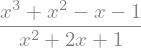

In [9]:
y = (x**3 + x**2 - x - 1)/(x**2 + 2*x + 1)
y

- And we can apply operations, e.g., simplification

In [10]:
sy.simplify(y)

### Find the derivative of an expression

$$\frac{d}{dx} \sin(x) e^x$$

- When using mathematical functions in expressions, we need to take them from SymPy

In [11]:
sy.diff(sy.sin(x) * sy.exp(x), x)

### Find the integral of an expression

$$\int e^x\sin x + e^x \cos x dx$$

In [12]:
sy.integrate(sy.exp(x) * sy.sin(x) + sy.exp(x) * sy.cos(x), x)

### Solve equations

- By default, SymPy assumes that the expression should be zero

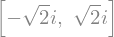

In [13]:
sy.solve(x**2+2, x)

- If the right hand side is not zero, we need to use `Eq`

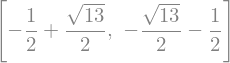

In [14]:
sy.solve(sy.Eq(x**2 + x, 3), x)

- Using `solveset()` we can obtain all solutions

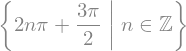

In [15]:
sy.solveset(sy.sin(x)+1, x)

### Some linear algebra

#### Define a matrix

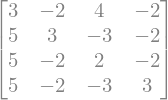

In [16]:
m = sy.Matrix([[3, -2,  4, -2], [5,  3, -3, -2], [5, -2,  2, -2], [5, -2, -3,  3]])
m

#### Matrix-matrix multiplication

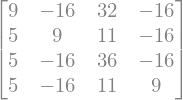

In [17]:
m * m

#### Inverse matrix

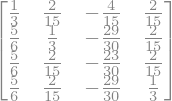

In [18]:
m_inv = m**(-1)
m_inv

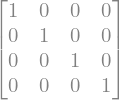

In [19]:
m * m_inv

#### Determinant

In [20]:
m.det()

#### Eigenvalues and eigenvectors

In [21]:
m.eigenvals()

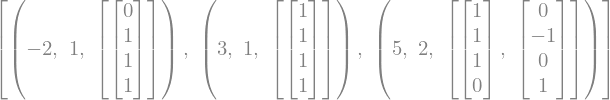

In [22]:
m.eigenvects()

In [23]:
sy.init_printing(use_latex=False)

-------------------------

## Limits of numerical precision

- Computers represent floating point numbers with a fixed number of digits
- Most used today
    - 64-bit floating point numbers (aka "doubles")
    - 53-bit mantissa $\implies$ ca. 16 digits
    - smallest and largest numbers ca. $10^{-308}$ and $10^{308}$
    - details defined in [IEEE754 Standard for Floating-Point Arithmetic](https://en.wikipedia.org/wiki/IEEE_754)
- Machine learning often uses lower precision to gain performance

#### Example

In [24]:
import math

In [25]:
math.exp(math.log(5))

4.999999999999999

The numerical error in this case is

In [26]:
math.exp(math.log(5)) - 5

-8.881784197001252e-16

- This is $-8.8817841970012523\times 10^{-16}$
- Such errors are unavoidable and we need to handle them properly
- *Numerical mathematics* is a branch of mathematics that focuses on how to obtain reliable results efficiently even while working with limited precision

#### Machine precision `eps`

Machine precision is the smallest number for which `1 + x > 1` yields `True`.

In [27]:
x = 1.
while 1 + x > 1:
    x /= 2
print(2*x)

2.220446049250313e-16


- This is the typical machine precision for 64-bit floating point numbers with 53-bit mantissa.
- It is equal to 

In [29]:
2**-52

2.220446049250313e-16

----------

## SciPy: A package for scientific computing with Python

- Builds on NumPy
- [User Guide](https://scipy.github.io/devdocs/tutorial/index.html#user-guide)
- Components
    - Special functions (scipy.special)
    - Integration (scipy.integrate)
    - Optimization (scipy.optimize)
    - Interpolation (scipy.interpolate)
    - Fourier Transforms (scipy.fft)
    - Signal Processing (scipy.signal)
    - Linear Algebra (scipy.linalg)
    - Sparse eigenvalue problems with ARPACK
    - Compressed Sparse Graph Routines (scipy.sparse.csgraph)
    - Spatial data structures and algorithms (scipy.spatial)
    - Statistics (scipy.stats)
    - Multidimensional image processing (scipy.ndimage)


### SciPy Example: Solving differential equations

- Simulate a three-body problem of "planets" moving according to Newton's laws
- For simplicity, we let the bodies move in the plane
- Each body is described completely by 
    - its mass $m_j$
    - its position ${\vec{r}}_j = (x_j, y_j)$
    - its velocity $\vec{v}_j = (v_{x, j}, v_{y, j})$
- The total force acting on each body is given by
$$
\vec{F}_j = -\Gamma \sum_{k\neq j} m_j 	\times m_k 	\times \frac{\vec{r}_j-\vec{r}_k}{\left|\vec{r}_j-\vec{r}_k
\right|^3}
$$
- The acceleration of a body is given by
$$
\vec{a}_j = \frac{\vec{F}_j}{m_j}
$$
- The change in position and velocity is given by
\begin{align}
\dot{\vec{v}}_ j &= \vec{a}_j \\
\dot{\vec{r}}_ j &= \vec{v}_j 
\end{align}

#### Implementation considerations

- SciPy supports integration of ODEs of the form
$$
\vec{y}'(t) = f(\vec{y}, t; parameters)
$$
- $\vec{y}$ is the *state vector* describing the system
- We need to combine all positions and velocities into one vector $\vec{y}$
- Example: three bodies, two dimensions
    - six coordinates (x and y for each of three bodies)
    - six velocity components
    - $\vec{y}$ has 12 dimensions

In [35]:
import scipy.integrate
import numpy as np
import matplotlib.pyplot as plt

#### Function computing the derivative

- Form of function prescribed by [scipy.integrate.odeint](http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.integrate.odeint.html)
- Set gravitational constant to 1 for convenience

In [36]:
GAMMA = 1    # gravitational constant

def f(y, t, masses):
    n_bodies = len(masses)
    n_coords = len(y) // 2
    n_dim = n_coords // n_bodies
    
    # Build derivative vector dy with same shape as state vector y
    # y : First half are positions, second half velocities
    # dy: First half are velocities, second half accelerations
    dy = np.zeros_like(y)
    dy[:n_coords] = y[n_coords:]   # copy velocities from second half of y
    
    # Turn positions into matrix with one row per body and one column per dimension
    r = y[:n_coords].reshape(n_bodies, n_dim) # positions
    a = np.zeros_like(r)   # accelerations, one row per body, one column per dim
    for body in range(n_bodies):
        for other_body in range(n_bodies):
            if other_body == body:
                continue
            # vector pointing from body to other_body
            d = r[other_body] - r[body]      
            
            # acceleration of body due to gravitational pull from other_body
            a[body,:] += (GAMMA * masses[other_body]
                          * d * (d.T @ d)**(-1.5))
    
    dy[n_coords:] = a.reshape(n_coords)   # accelerations: v' = a
    
    return dy

#### Euler integration

- Simplest ODE integration scheme
- Time discretized as $t_k = k \Delta t$
- Update rule
$$
\vec{y}_{k+1} = \vec{y}_k + \Delta t f(\vec{y}_k, t_k)
$$
- The function integrates the ODE from the given initial positions until tmax with time steps dt
- We assume initial velocities zero
- Returns three arrays:
    - positions `r[body, dim, time]`
    - velocities `v[body, dim, time]`
    - time

In [37]:
def planets_euler(masses, r0, dt, tmax):
    n_bodies, n_dim = r0.shape
    n_coords = n_bodies * n_dim

    t = np.arange(0., tmax, dt)
    npoints = len(t)

    y = np.zeros((npoints, 2*n_coords))
    y[0, :n_coords] = r0.reshape(n_coords)
    for n in range(npoints-1):
        y[n+1, :] = y[n, :] + dt * f(y[n, :], n*dt, masses)
        
    r = y[:, :n_coords].T.reshape((n_bodies, n_dim, -1))
    v = y[:, n_coords:].T.reshape((n_bodies, n_dim, -1))
    
    return r, v, t

#### Integration using `odeint` from `scipy.integrate`

- Uses advance ODE integration function
- Takes same input and returns same output as `planets_euler`

In [38]:
def planets_odeint(masses, r0, dt, tmax):
    n_bodies, n_dim = r0.shape
    n_coords = n_bodies * n_dim

    t = np.arange(0., tmax, dt)
    npoints = len(t)

    y0 = np.zeros(2 * n_coords)
    y0[:n_coords] = r0.reshape(n_coords)
    y = scipy.integrate.odeint(f, y0, t, (masses,))
        
    r = y[:, :n_coords].T.reshape((n_bodies, n_dim, -1))
    v = y[:, n_coords:].T.reshape((n_bodies, n_dim, -1))
    
    return r, v, t

#### Simulate example system

- Three bodies in 2-dimensional space

In [39]:
masses = np.array([5., 3., 4.])
r0 = np.array([[1., -1.], [1., 3.], [-2., -1.]])
re, ve, te = planets_euler(masses, r0, 0.001, 10)
ro, vo, to = planets_odeint(masses, r0, 0.001, 10)

#### Plot motions in plane

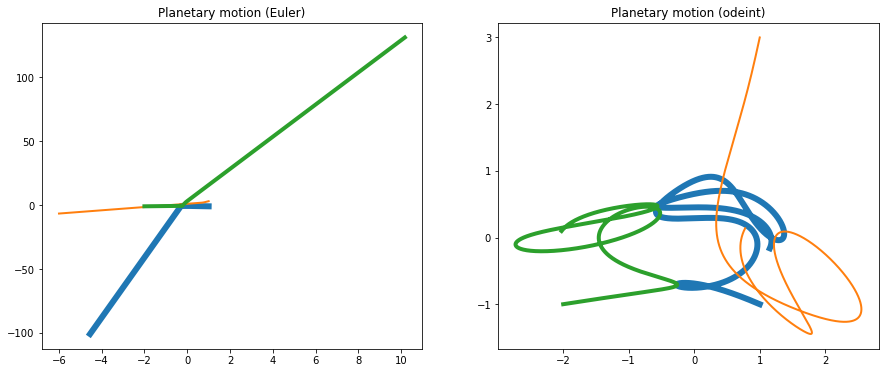

In [42]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
for ix, m in enumerate(masses):
    plt.plot(re[ix, 0,:], re[ix, 1, :], lw=2*(m-2))
plt.title('Planetary motion (Euler)')

plt.subplot(1, 2, 2)
for ix, m in enumerate(masses):
    plt.plot(ro[ix, 0,:], ro[ix, 1, :], lw=2*(m-2))
plt.title('Planetary motion (odeint)');

- Signficantly different
- Which one is correct?

#### Calculation of total energy in systems

$$E_{\text{tot}} = E_{\text{kin}} + E_{\text{pot}} = \frac{1}{2}\sum_j m_j |\vec{v}_j|^2
  + \Gamma \sum_{k\neq j}  \frac{m_j 	\times m_k}{\left|\vec{r}_j-\vec{r}_k
\right|} = \text{const}$$

In [45]:
def total_energy(r, v, masses):
    n_bodies, n_dim, n_t = r.shape
    energy = np.zeros(n_t)
    
    for n in range(n_t):
        for body in range(n_bodies):
            
            # kinetic energy
            energy[n] = (0.5 * masses[body] 
                         * v[body, :, n].T @ v[body, :, n])

            # potential energy
            for other_body in range(n_bodies):
                if other_body == body:
                    continue
                d = r[other_body, :, n] - r[body, : , n]
                energy[n] += (GAMMA * masses[body] * masses[other_body]
                              * (d.T @ d)**(-0.5))
    
    return energy

In [46]:
energy_e = total_energy(re, ve, masses)
energy_o = total_energy(ro, vo, masses)

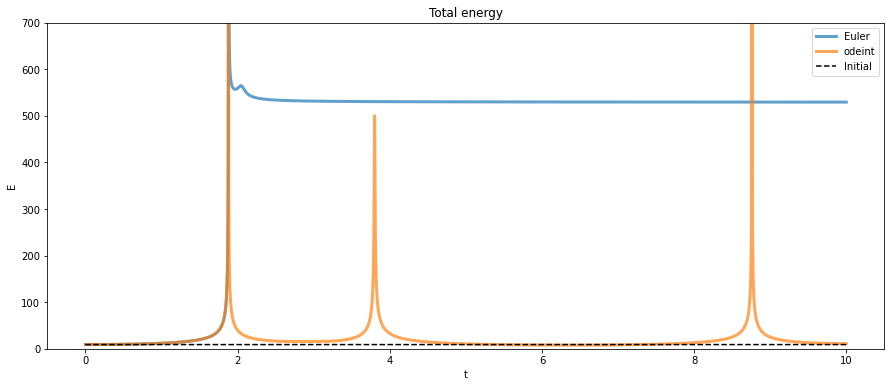

In [48]:
plt.figure(figsize=(15, 6))
plt.plot(te, energy_e, lw=3, alpha=0.7, label='Euler')
plt.plot(to, energy_o, lw=3, alpha=0.7, label='odeint')
plt.plot(to, energy_o[0]*np.ones_like(to), 'k--', label='Initial')
plt.legend()
plt.title('Total energy')
plt.xlabel('t')
plt.ylabel('E')
plt.ylim(0, 700);

- Euler is definitely wrong
- Odeint also shows deviations, but relaxes to values much closer to the initial energy
- Odeint solution is graphically consistent with textbook solutions (Gruntz & Waldvogel in Gander & Hřebíček (eds) Problem Solving problems in scientific computing using Maple and MATLAB, Springer-Verlag, 2004, pp 51-72)